# Python 練習帳（数値計算向け，Colab版）

### 宇都宮大学　吉田勝俊

## １．基本的事項

### 用語説明
* 「Colab ノートブック」　今みているこの文書．
* 「セル」　Colab ノートブック内の入力可能な枠．
* 「テキストセル」　文章を記述するためのセル．今読んでるここがテキストセルである．
* 「コードセル」　Pythonのコードが実行できるセル．次行はコードセルである．

### コードセルの実行方法

* 該当セルをクリックして選択すると，セルの左側に <font color="red"> 実行ボタン</font>（再生ボタンみたいな）が現れる．それをクリックする．
* または，選択中にキーボードから <font color="red">《Ctrl-Enter》</font> する （<font color="red">Ctrlキーを押しながらEnterキーを押す</font>）．
    * ブラウザによっては《Shift-Enter》も受け付けるみたい

### コードセルの追加方法

* 左上メニューの「挿入」→「コードセル」で追加できる．

### コメントアウト

* コードセル内に <font color="red">#</font> 文字を置くと，そこから行末までを python は無視します．コードセル内のメモ書きに使います．

## ２．Python による数値計算

以下のコードセルを，順番に実行してみましょう．（実行ボタンをクリックするか，《Ctrl-Enter》）

### 四則演算・べき乗

In [1]:
1+2*3/4 # 1＋2×3÷4

2.5

In [2]:
2**3 # 2の3乗

8

### ベクトル・行列

ベクトル演算するには，それ用のライブラリ（拡張機能）をインポートする（読み込む）必要があります．

In [3]:
import numpy as np # ベクトル演算ライブラリ numpy を，短縮名 np でインポートする．

#### 【ベクトルの作成】

In [4]:
v = np.array([1, -2, 3]) # ベクトル v の作成
print(v) #成分の確認

[ 1 -2  3]


#### 【ベクトルの成分】　<font color="red">※ Python の添字は `0` から始まる（C言語などと同じ）</font>

In [5]:
print( v[0] ) # Python の第0成分 = 数学の第1成分
print( v[1] ) # Python の第1成分 = 数学の第2成分
print( v[2] ) # Python の第2成分 = 数学の第3成分

1
-2
3


#### 【行列の作成】

In [6]:
A = np.array([
    [-1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]) # 行列 A の作成
print(A) # 成分の確認

[[-1  2  3]
 [ 4  5  6]
 [ 7  8  9]]


#### 【行列の成分】

In [7]:
print( A[2, 1] ) # Pythonの3行2列成分 ＝ 数学の2行1列成分

8


#### 【行列の行ベクトル】 " <font color="red">:</font> " で全成分を表す．この操作をPythonでは「スライス」という．

In [8]:
print( A[0, :] ) # Pythonの第0 行ベクトル ＝ 数学の第1 行ベクトル
print( A[1, :] ) # Pythonの第1 行ベクトル ＝ 数学の第2 行ベクトル
print( A[2, :] ) # Pythonの第2 行ベクトル ＝ 数学の第3 行ベクトル

[-1  2  3]
[4 5 6]
[7 8 9]


#### 【行列の列ベクトル】

In [9]:
print( A[:, 0] ) # Pythonの第0 列ベクトル ＝ 数学の第1 列ベクトル
print( A[:, 1] ) # Pythonの第1 列ベクトル ＝ 数学の第2 列ベクトル
print( A[:, 2] ) # Pythonの第2 列ベクトル ＝ 数学の第3 列ベクトル

[-1  4  7]
[2 5 8]
[3 6 9]


#### 【行列の転置】

In [10]:
Atrans = A.T # (行列).T で転置を表す
print(Atrans) # 成分の確認

[[-1  4  7]
 [ 2  5  8]
 [ 3  6  9]]


### 線形代数

線形代数するには，それ用のライブラリ（拡張機能）をインポートする（読み込む）必要があります．

In [11]:
import numpy.linalg as la # numpy に含まれる線形代数ライブラリを，短縮名 la でインポートする．

#### 【ベクトルの内積】

In [12]:
w = np.array([1, -2, 5]) # ベクトル w の作成
np.dot(v, w) # ベクトル v とベクトル w の内積

20

#### 【行列とベクトルの積】

In [13]:
np.dot(A, v) # 行列 A とベクトル v の積

array([ 4, 12, 18])

#### 【行列と行列の積】

In [14]:
np.dot(A, Atrans) # 行列 A と行列 Atrans の積

array([[ 14,  24,  36],
       [ 24,  77, 122],
       [ 36, 122, 194]])

#### 【逆行列】

In [15]:
Ainv = la.inv(A) # A の逆行列
print( 'Ainv = ', Ainv) # 逆行列の成分
AinvA = np.dot(Ainv, A) # 行列と逆行列の積
print( 'AinvA = ', AinvA)

Ainv =  [[-0.5         1.         -0.5       ]
 [ 1.         -5.          3.        ]
 [-0.5         3.66666667 -2.16666667]]
AinvA =  [[ 1.00000000e+00 -2.22044605e-15 -3.77475828e-15]
 [ 0.00000000e+00  1.00000000e+00  7.10542736e-15]
 [ 8.88178420e-16  0.00000000e+00  1.00000000e+00]]


**※ 計算機誤差について**

- `AinvA` は数学的には単位行列になるはずだが，そうなってない．
    - "8.88178420e-16" 等は $8.88178420 \times 10^-16$ のコンピュータ表記である．
    - `AinvA` の非対角要素は，`0`ではないものの，`0`に極めて近い．
- このような真値からのズレは，電算機の丸め誤差から生じている．このような誤差を，**計算機誤差** という．
- しばしば，次のように言い表す．「計算機誤差を考慮すると，`AinvA` は単位行列とみなせる」

#### 【行列の固有値・固有ベクトル】 <font color="red">計算結果の列ベクトルが固有ベクトル</font>

計算結果をそのまま表示

In [16]:
eig_val, eig_vec = la.eig(A)
print( '固有値', eig_val) # 固有値の並び
print( '固有ベクトル', eig_vec) # 列ベクトルが固有ベクトルを表す

固有値 [15.91419258 -2.77849996 -0.13569263]
固有ベクトル [[-0.20845476 -0.88435591  0.15856557]
 [-0.52872502  0.10368394 -0.79983004]
 [-0.82279795  0.45515302  0.57890316]]


対応する固有値・固有ベクトルごとに表示

In [17]:
print( eig_val[0], eig_vec[:,0] ) # 1つ目の固有値・固有ベクトル
print( eig_val[1], eig_vec[:,1] ) # 2つ目の固有値・固有ベクトル
print( eig_val[2], eig_vec[:,2] ) # 3つ目の固有値・固有ベクトル

15.914192581153744 [-0.20845476 -0.52872502 -0.82279795]
-2.7784999552313403 [-0.88435591  0.10368394  0.45515302]
-0.13569262592243475 [ 0.15856557 -0.79983004  0.57890316]


### 複素数 

<p><font color="red">`j`で虚数単位を表す</font></p>

In [18]:
z = 1 + 2j
z

(1+2j)

【複素共役（conjugate）】

In [19]:
np.conj(1+2j)

(1-2j)

【複素数の実部（real part）と虚部（imaginary part）】

In [20]:
np.real(z) # 実部

1.0

In [21]:
np.imag(1+2j) # 虚部

2.0

【複素数の四則演算】

In [22]:
(1 + 2j) + (3 + 4j) # 複素数ごとに括弧でくくること推奨！

(4+6j)

In [23]:
1 + 2j + 3 + 4j # 括弧なしでもできるけど，見にくい！

(4+6j)

In [24]:
(1 + 2j) / (3 + 4j) # 割り算してみる．引き算 - ，掛け算 *  も普通にできる．

(0.44+0.08j)

【複素数の絶対値（absolute value）と偏角（angle）】

In [25]:
print( 'abs = ', np.abs(1+2j)) # 絶対値
print( 'angle = ', np.angle(1+2j)) #  偏角

abs =  2.23606797749979
angle =  1.1071487177940904


### n 次方程式の根（root）

- $a_n x^n + a_{n-1} x^{n-1} + \cdots + a_1 x + a_0 = 0$ の根は次のコードで得られる．

> np.roots( [$a_n$, $a_{n-1}$, $\cdots$, $a_1$, $a_0$] )


$x^2 + 2x + 3 = 0$ の根（実数根）

In [26]:
np.roots([1, 3, 2])

array([-2., -1.])

$x^2 + 1 = x^2 + 0x + 1 = 0$ の根（複素数根）

In [27]:
np.roots([1, 0, 1])

array([-0.+1.j,  0.-1.j])

$2x^4 + 7x^3 + x^2 + 2x + 3 = 0$ の根（どうなるでしょう？）

In [28]:
np.roots([2, 7, 1, 2, 3])

array([-3.40131658+0.j        ,  0.31084386+0.71803095j,
        0.31084386-0.71803095j, -0.72037114+0.j        ])

## ３．Python の制御文とユーザ関数

### 繰り返し処理（ループ）

次のように `for` を使って記述します．

```python
for 変数名 in range(反復回数): ←コロンを忘れずに！
    インデントブロック　※
    インデントブロック　※複数行に渡ってよい
    インデントブロック　※
```


- 半角スペース…日本語入力OFFのときに入力される英語の空白文字．他方，かな漢字のスペースを全角スペースという．
- インデント…半角スペースによる字下げ．全角スペースでインデントすると文法エラーになる．
- インデントブロック…インデントの文字数を揃えた複数行の処理（1行でもよい）．<font color="red">途中の空行は無視してくれる．</font>
- Colab のコードセルは，インデント入力を補完する機能を備えている．

In [29]:
A = np.array([
    [-1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]) # 行列 A の作成

for i in range(3): # i は 0, 1, 2 と動く
    for j in range(3): # その中で，j は 0, 1, 2 と動く
        print((i,j),A[i,j])

(0, 0) -1
(0, 1) 2
(0, 2) 3
(1, 0) 4
(1, 1) 5
(1, 2) 6
(2, 0) 7
(2, 1) 8
(2, 2) 9


### 条件分岐

次のように `if` を使って記述します．

```python
if 条件: ←コロンを忘れずに！
    インデントブロック（条件を満したときの処理）※複数行に渡ってよい
```

または

```python
if 条件: ←コロンを忘れずに！
    インデントブロック（条件を満したときの処理）
else: ←コロンを忘れずに！
    インデントブロック（条件を満たさないときの処理）
```

または

```python
if 条件１: ←コロンを忘れずに！
    インデントブロック（条件１を満したときの処理）
elif 条件２: ←コロンを忘れずに！
    インデントブロック（条件１を満たさず，条件２を満たしたときの処理）
else: ←コロンを忘れずに！
    インデントブロック（それ以外の処理）
```

※ `elif` は，いくつあっても（無くても）大丈夫です．

In [30]:
A = np.array([
    [-1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]) # 行列 A の作成

for i in range(3):
    for j in range(3):
        if i == j:
            print( '対角要素', A[i,j] )
        elif i<j:
            print( '上三角', A[i,j] )
        else:
            print( 'それ以外（下三角）', A[i,j] )


対角要素 -1
上三角 2
上三角 3
それ以外（下三角） 4
対角要素 5
上三角 6
それ以外（下三角） 7
それ以外（下三角） 8
対角要素 9


### ユーザー関数の定義

自分で新しい関数を作ることができます．`def` を使って次のように記述します．

```python
def 関数名(引数1, 引数2, …): ←コロンを忘れずに！
    インデントブロック　※複数行に渡ってよい
    return 戻り値　←必要なければ省略可能
```

【１変数関数の例】

In [31]:
def my_angle(c): #複素数から偏角を求めるユーザー関数
    imag = np.imag(c) # 実部
    real = np.real(c) # 虚部
                      # 空行は無視される
    angle = np.arctan(imag/real) # 偏角の数学的な定義
                      # 空行は無視される    
    return angle

In [32]:
my_angle(1 + 2j)

1.1071487177940904

In [33]:
np.angle(1 + 2j)

1.1071487177940904

Numpy の `angle` 関数と同じ答えが出せてます．

【１変数関数で，戻り値を複数返す場合】

In [34]:
def my_real_imag_angle(c): #複素数から偏角を求めるユーザー関数
    imag = np.imag(c) # 実部
    real = np.real(c) # 虚部
    
    angle = np.arctan(imag/real) # 偏角の数学的な定義
    
    return (real, imag, angle) #カッコ内にコンマで並べるだけ

In [35]:
my_real_imag_angle(1 + 2j)

(1.0, 2.0, 1.1071487177940904)

複数の戻り値は，カンマで並べた変数に一括代入できます．

In [36]:
re, im, ang = my_real_imag_angle(1 + 2j)

print(re)
print(im)
print(ang)

1.0
2.0
1.1071487177940904


## ４．Python によるグラフ作成

グラフを作成するには，それ用のライブラリ（拡張機能）をインポートする（読み込む）必要があります．

In [37]:
import matplotlib.pyplot as plt # グラフ作成ライブラリを，短縮名 plt でインポートする．

【横軸を表す等差数列】　Python のプログラム例では，変数 x の複数形？ xs で数列やベクトルを表すことが多い．

In [38]:
xs = np.linspace( -5, 5, 100 ) # -5 〜 5 を100等分した等差数列
xs

array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
       -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909,
       -3.98989899, -3.88888889, -3.78787879, -3.68686869, -3.58585859,
       -3.48484848, -3.38383838, -3.28282828, -3.18181818, -3.08080808,
       -2.97979798, -2.87878788, -2.77777778, -2.67676768, -2.57575758,
       -2.47474747, -2.37373737, -2.27272727, -2.17171717, -2.07070707,
       -1.96969697, -1.86868687, -1.76767677, -1.66666667, -1.56565657,
       -1.46464646, -1.36363636, -1.26262626, -1.16161616, -1.06060606,
       -0.95959596, -0.85858586, -0.75757576, -0.65656566, -0.55555556,
       -0.45454545, -0.35353535, -0.25252525, -0.15151515, -0.05050505,
        0.05050505,  0.15151515,  0.25252525,  0.35353535,  0.45454545,
        0.55555556,  0.65656566,  0.75757576,  0.85858586,  0.95959596,
        1.06060606,  1.16161616,  1.26262626,  1.36363636,  1.46464646,
        1.56565657,  1.66666667,  1.76767677,  1.86868687,  1.96

【sin関数の例】

In [39]:
ys = np.sin(xs)
ys

array([ 0.95892427,  0.98264051,  0.99633934,  0.99988113,  0.99322975,
        0.97645303,  0.94972199,  0.91330913,  0.86758566,  0.8130177 ,
        0.75016154,  0.67965796,  0.60222569,  0.51865411,  0.42979519,
        0.33655477,  0.23988339,  0.14076655,  0.04021468, -0.06074715,
       -0.1610897 , -0.25979004, -0.35584199, -0.44826636, -0.53612093,
       -0.61851008, -0.69459392, -0.76359681, -0.82481532, -0.87762535,
       -0.92148855, -0.95595775, -0.98068157, -0.99540796, -0.99998679,
       -0.99437139, -0.978619  , -0.95289021, -0.91744731, -0.87265161,
       -0.81895978, -0.75691917, -0.68716224, -0.61040014, -0.52741539,
       -0.43905397, -0.34621667, -0.24984992, -0.1509361 , -0.05048358,
        0.05048358,  0.1509361 ,  0.24984992,  0.34621667,  0.43905397,
        0.52741539,  0.61040014,  0.68716224,  0.75691917,  0.81895978,
        0.87265161,  0.91744731,  0.95289021,  0.978619  ,  0.99437139,
        0.99998679,  0.99540796,  0.98068157,  0.95595775,  0.92

Text(0,0.5,'sin(x)')

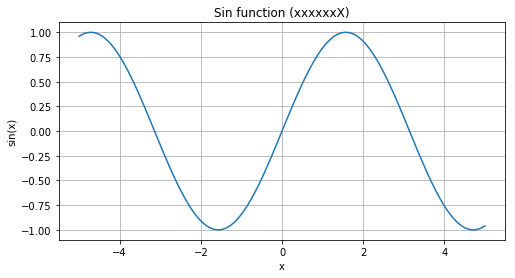

In [40]:
plt.figure( figsize=(8,4) ) # グラフ用紙のサイズ
plt.plot( xs, ys ) # プロット命令
plt.grid() # グリッド表示

### 各種のラベルやタイトルに，日本語は避けたほうが安全です．（文字化けするかも）
plt.title( 'Sin function (xxxxxxX)' ) # 学籍番号を入れときましょう
plt.xlabel( 'x' )  # 横軸ラベル
plt.ylabel( 'sin(x)' )  # 横軸ラベル

【グラフの印刷】

- 一番お手軽だと思われるのは，グラフ画像をワープロソフトに，コピペしてから印刷する方法です．
    - 表示されているグラフ画像の，右クリックメニュー等から「画像をコピー」を実行する．
    - ワードやパワーポイントなどのファイルにペーストする．
    - そのソフトの印刷機能を使って印刷する．